In [1]:
import pandas as pd

- Lod the training data

In [2]:
sentiment=pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv', encoding = 'latin',header=None)

In [3]:
sentiment

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


- load the testing data

- Add headers for the columns in each dataframe:

In [4]:
sentiment.columns = ['label', 'id', 'date', 'query', 'user_id', 'text']

- Delete unneeded columns

In [5]:
sentiment.drop(columns=["id","date",'query','user_id'],inplace=True)

In [6]:
sentiment.head()

,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [7]:
sentiment['label'].value_counts()

label
0    800000
4    800000
Name: count, dtype: int64

In [8]:
sentiment['label'].replace({4: 1}, inplace=True) 

/tmp/ipykernel_34/4248491102.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sentiment['label'].replace({4: 1}, inplace=True)


- Add the two data frame in one datarame

- Check for cleaning data

In [9]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   label   1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [10]:
sentiment.isnull().sum()

label    0
text     0
dtype: int64

In [11]:
sentiment.duplicated().sum()

16309

In [12]:
sentiment.drop_duplicates(inplace=True)
sentiment.duplicated().sum()

0

- preprocessing the text n the data:

In [13]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora
nltk.data.path.append("/kaggle/working/nltk_data/")

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...
Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/nltk_data/c

- this function for cleaning the text:

In [14]:

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text

In [15]:
x=sentiment.drop('label',axis=1)
y=sentiment['label']

In [16]:
texts=list(x['text'])

In [17]:
cleaned_text = [process_text(text) for text in texts]

In [18]:
print(cleaned_text[:10])

[['switchfoot', 'http', 'twitpic', 'awww', 'bummer', 'shoulda', 'david', 'carr', 'third'], ['upset', 'update', 'facebook', 'texting', 'might', 'result', 'school', 'today', 'also', 'blah'], ['kenichan', 'dived', 'many', 'time', 'ball', 'managed', 'save', 'rest', 'bound'], ['whole', 'body', 'feel', 'itchy', 'like', 'fire'], ['nationwideclass', 'behaving'], ['kwesidei', 'whole', 'crew'], ['need'], ['loltrish', 'long', 'time', 'rain', 'fine', 'thanks'], ['tatianak', 'nope'], ['twittera', 'muera']]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

- prepare the data to the model:

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words=40000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx)
print("the size of vocab =", v)  # Corrected spacing
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


2024-04-29 15:22:21.512568: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 15:22:21.512675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 15:22:21.644159: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


the size of vocab = 510519


In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)



In [22]:
y.value_counts()

label
1    793506
0    790185
Name: count, dtype: int64

- build the model

In [23]:
from keras.models import Sequential
from keras.layers import Embedding,Conv1D,Dense,Input,Dropout,GlobalMaxPooling1D
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
D=50
inputt=Input(shape=(maxlen,))

# Model 1

In [24]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.001  

x=Embedding(v+1,D)(inputt)
x=Conv1D(filters=64, kernel_size=3, activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x = Dropout(0.5)(x)
x=Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x=Dense(2, activation='softmax')(x)

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [26]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)
history = model.fit(X_train, y_train_one_hot, epochs=5, validation_data=(X_test, y_test_one_hot))


Epoch 1/5
   30/39593 ━━━━━━━━━━━━━━━━━━━━ 3:33 5ms/step - accuracy: 0.5195 - loss: 0.6923

I0000 00:00:1714404188.618320     121 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


39593/39593 ━━━━━━━━━━━━━━━━━━━━ 231s 6ms/step - accuracy: 0.7308 - loss: 0.5384 - val_accuracy: 0.7615 - val_loss: 0.4913
Epoch 2/5
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 223s 6ms/step - accuracy: 0.7669 - loss: 0.4918 - val_accuracy: 0.7647 - val_loss: 0.4868
Epoch 3/5
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 223s 6ms/step - accuracy: 0.7757 - loss: 0.4790 - val_accuracy: 0.7646 - val_loss: 0.4881
Epoch 4/5
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 222s 6ms/step - accuracy: 0.7819 - loss: 0.4693 - val_accuracy: 0.7647 - val_loss: 0.4875
Epoch 5/5
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 223s 6ms/step - accuracy: 0.7863 - loss: 0.4612 - val_accuracy: 0.7646 - val_loss: 0.4906


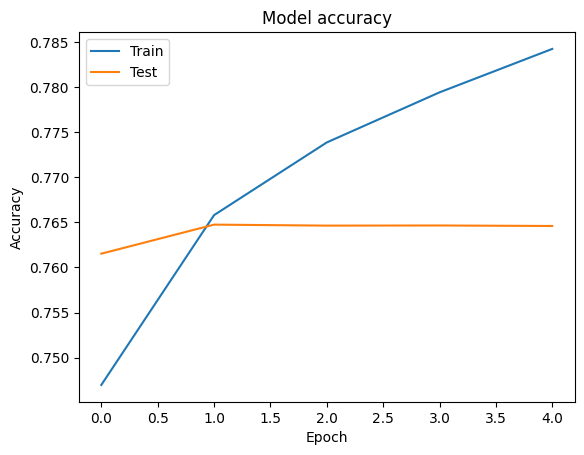

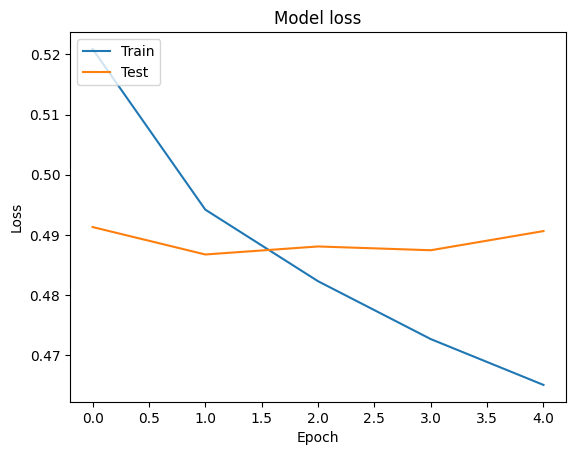

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [28]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


9899/9899 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.7632 - loss: 0.4913
Test Loss: 0.49064791202545166
Test Accuracy: 0.7645948529243469


9899/9899 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


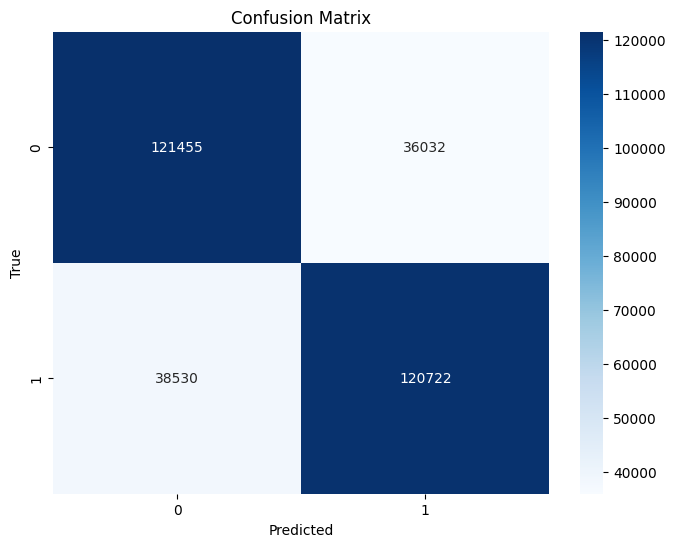

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Model2

In [30]:
learning_rate = 0.001  

x=Embedding(v+1,D)(inputt)
x=Conv1D(filters=128, kernel_size=3, activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x = Dropout(0.5)(x)
x=Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x=Dense(2, activation='softmax')(x)

model1 = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
history1 = model1.fit(X_train, y_train_one_hot, epochs=5, validation_data=(X_test, y_test_one_hot))

Epoch 1/5
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 237s 6ms/step - accuracy: 0.7343 - loss: 0.5337 - val_accuracy: 0.7621 - val_loss: 0.4912
Epoch 2/5
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 228s 6ms/step - accuracy: 0.7705 - loss: 0.4858 - val_accuracy: 0.7640 - val_loss: 0.4844
Epoch 3/5
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 227s 6ms/step - accuracy: 0.7799 - loss: 0.4709 - val_accuracy: 0.7668 - val_loss: 0.4892
Epoch 4/5
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 231s 6ms/step - accuracy: 0.7867 - loss: 0.4599 - val_accuracy: 0.7663 - val_loss: 0.4893
Epoch 5/5
39593/39593 ━━━━━━━━━━━━━━━━━━━━ 227s 6ms/step - accuracy: 0.7923 - loss: 0.4503 - val_accuracy: 0.7654 - val_loss: 0.4959


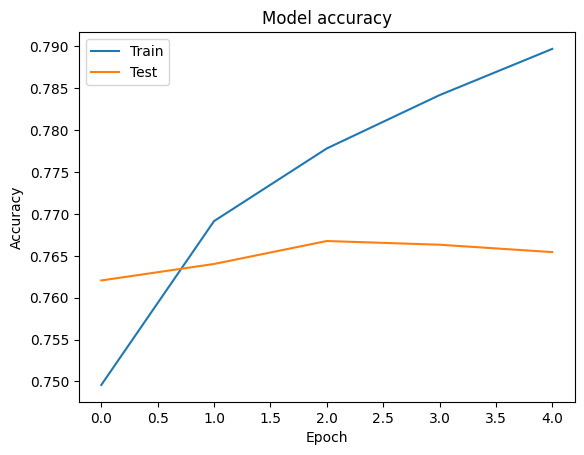

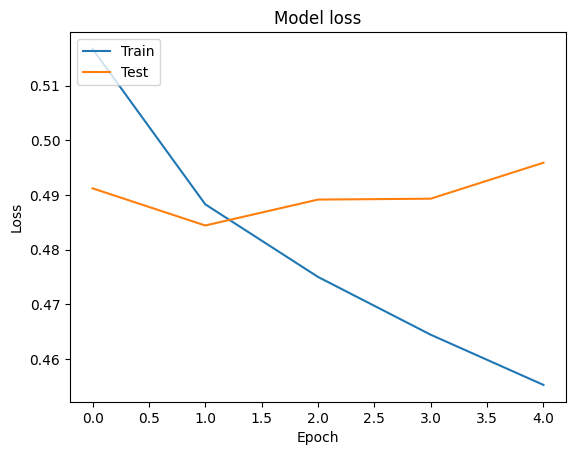

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [33]:
# Evaluate the model on the test data
loss, accuracy = model1.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


9899/9899 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7640 - loss: 0.4970
Test Loss: 0.49590471386909485
Test Accuracy: 0.7654440999031067


9899/9899 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


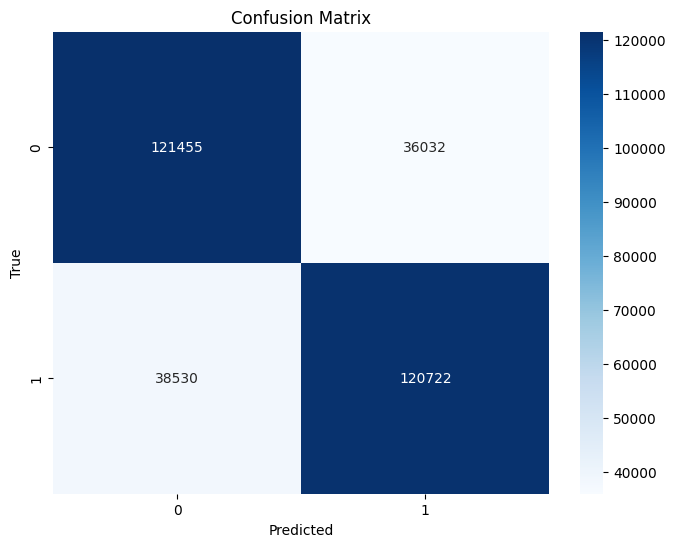

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
